# train
    1342 healf Persons
    3876 Pneu Persons
        1345 Virus
        2543 Bacteria
# test
    234 healf Persons
    390 Pneu Persons
        148 Virus
        242 Bacteria
### ImageDataGenerator
    its necessery to create new data

In [1]:
#'pip install pilow' to install pil
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import keras
from keras import models
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#To get the name of the images in a list
import glob
from random import shuffle
# import BatchNormalization
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
IMG_SIZE = 40 #Reflects on main memory consumption'

In [3]:
#Import image
imagem = Image.open("/home/franklyn/Downloads/chest_xray/chest_xray/train/NORMAL/IM-0115-0001.jpeg")
imagem = imagem.convert('L')#Convert Image to Gray scale
imagem = imagem.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
imagem2 = np.array(imagem)
imagem = np.array([imagem2]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)#não sei pq, so sei que tem que ser assim

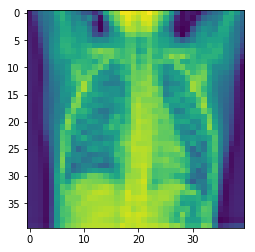

In [4]:
#Show Image
plt.imshow(imagem2)

# Convonet

## Denso VS Convolucionario:
	Denso:Achar padroes globais
	Conv: Encontrar padrões locais na imagem
## Compilation
	Optimizer: <https://keras.io/optimizers/>
	loss -> model will try to minimize: <https://keras.io/losses/>
        loss='binary_crossentropy' for 
	metrics() -> For any classification problem you will want to set this to metrics=['accuracy']
## Ativation Function
	A mais indicada para redes Convolucionais é a RELU
## Layers
    Dropout: Evit overfiting
    Conv2D: Create N filter on image based in the tuple(Kernel)
    Flatten: Unific a lot of filter in a paralel linear output. you wil lost the image format
    SpatialDropout2D: If adjacent pixels within feature maps are strongly correlated (as is normally the case in early convolution layers)
    SeparableConv2D ?
    MAXPOOLING: Simplify the information, just the max value in kernel will be outputed
        https://computersciencewiki.org/index.php/File:MaxpoolSample2.png
    BatchNormalization ?

In [5]:
#Create initial model
modelo = Sequential()

modelo.add(Conv2D(10, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
modelo.add(MaxPooling2D(pool_size=(2, 2)))
modelo.add(Flatten())

#evitar over fit
modelo.add(Dropout(0.5))

modelo.add(Dense(1, activation='relu'))

#Ultima camada ser softmax ou sigmoid

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 38, 38, 10)        100       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3610)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3610)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3611      
Total params: 3,711
Trainable params: 3,711
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Compilation
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [8]:
layer_outputs = [layer.output for layer in modelo.layers[:8]]

In [9]:
activation_model = models.Model(inputs=modelo.input, outputs=layer_outputs)

In [10]:
activations = activation_model.predict([imagem])

In [11]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 38, 38, 10)


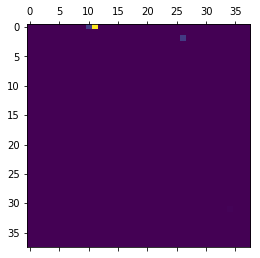

In [12]:
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')

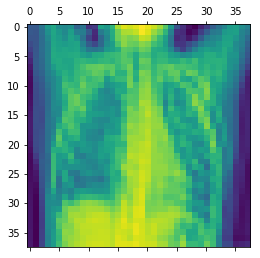

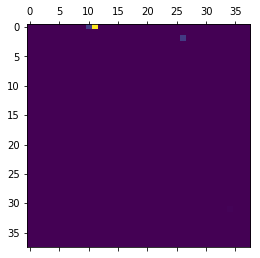

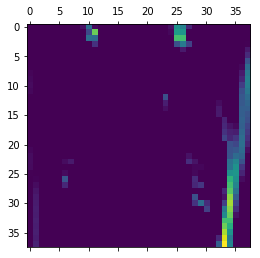

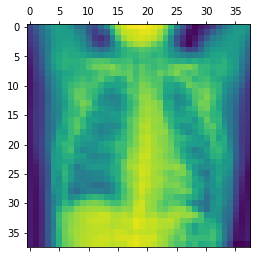

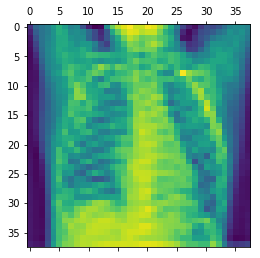

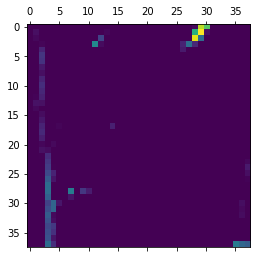

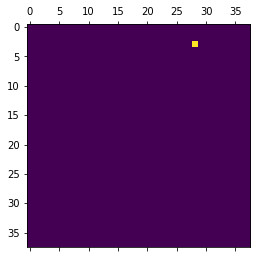

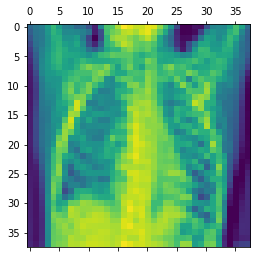

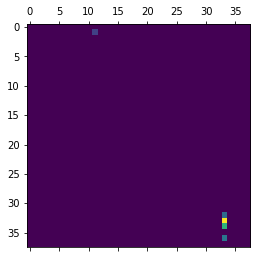

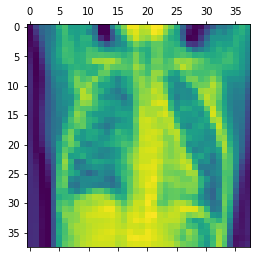

In [13]:
for i in range(10):
    plt.matshow(first_layer_activation[0, :, :, i], cmap='viridis')

# Final Considers
## Save Your Progress
	modelo.save_weights(filepath)
	modelo.load_weights(filepath)

In [14]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True,
    #vertical_flip=True,
    fill_mode='nearest')

In [15]:
from keras.preprocessing import image
img = image.load_img(
    "/home/franklyn/Downloads/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1360-0001.jpeg"
    , target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

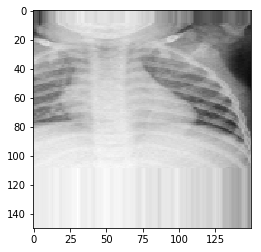

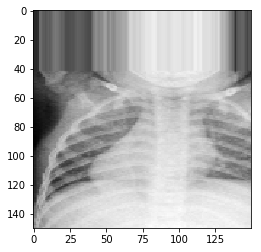

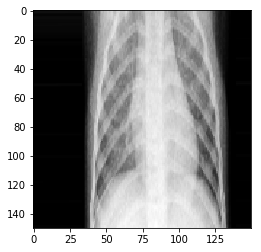

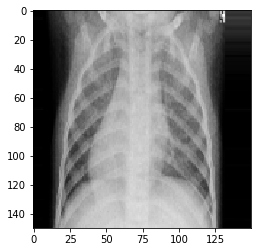

In [23]:
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4==0:
        break
plt.show()

In [22]:
#Daniel Por favor criar função para gerar images e colocar em uma pasta
#"Data augmentation"
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory("genData/train",
                        target_size=(IMG_SIZE, IMG_SIZE),
                        batch_size=1,
                        class_mode='binary',
                        color_mode = "grayscale")

validation_generator = test_datagen.flow_from_directory("genData/test",
                        target_size=(IMG_SIZE, IMG_SIZE),
                        batch_size=1,
                        class_mode='binary',
                        color_mode = "grayscale")

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [18]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    break

ZeroDivisionError: integer division or modulo by zero

In [24]:
history = modelo.fit_generator(train_generator,steps_per_epoch=100,epochs=3,validation_data=validation_generator,validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/3


ZeroDivisionError: integer division or modulo by zero

In [25]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [ ]:

#gets train, validation and test data
def load_training_data():
    train_normal_images = glob.glob("/home/franklyn/Downloads/chest_xray/chest_xray/train/NORMAL/*.jpeg")
    train_pneumonia_images = glob.glob("/home/franklyn/Downloads/chest_xray/chest_xray/train/PNEUMONIA/*.jpeg")
    train_data = []
    #label 0 = normal
    #label 1 = pneumonia
    label = 1
    for img in train_normal_images:
        img = Image.open(img)
        img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        train_data.append([np.array(img), 0]) #normal
        
    for img in train_pneumonia_images:
        img = Image.open(img)
        img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        train_data.append([np.array(img), 1]) #pneumonia
    shuffle(train_data)
    return train_data

#validation_pneumonia_images = glob.glob("/home/franklyn/Downloads/chest_xray/chest_xray/val/NORMAL/*.jpeg")
#validation_pneumonia_images = glob.glob("/home/franklyn/Downloads/chest_xray/chest_xray/val/PNEUMONIA/*.jpeg")

#test_normal_images = glob.glob("/home/franklyn/Downloads/chest_xray/chest_xray/test/NORMAL/*.jpeg")
#test_pneumonia_images = glob.glob("/home/franklyn/Downloads/chest_xray/chest_xray/test/PNEUMONIA/*.jpeg")


In [ ]:
train_data = load_training_data()

In [ ]:
#test load data
img_test = 42
print("label: {}".format(train_data[img_test][1]))
plt.imshow(train_data[img_test][0], cmap = 'gist_gray')

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(1, activation = 'softmax'))

In [ ]:
#Compilation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
#Separete classes from the features(image)
train_images = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
train_labels = np.array([i[1] for i in train_data])


In [ ]:
model.fit(train_images, train_labels, batch_size=5, epochs=10, verbose=1)

In [80]:
def load_testing_data():
    test_normal_images = glob.glob("/home/franklyn/Downloads/chest_xray/chest_xray/test/NORMAL/*.jpeg")
    test_pneumonia_images = glob.glob("/home/franklyn/Downloads/chest_xray/chest_xray/test/PNEUMONIA/*.jpeg")
    test_data = []
    #label 0 = normal
    #label 1 = pneumonia
    label = 1
    for img in test_normal_images:
        img = Image.open(img)
        img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        test_data.append([np.array(img), 0]) #normal
        
    for img in test_pneumonia_images:
        img = Image.open(img)
        img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        test_data.append([np.array(img), 1]) #pneumonia
    shuffle(test_data)
    return test_data

In [81]:
#Separete classes from the features(image)
test_images = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_labels = np.array([i[1] for i in train_data])

In [83]:
loss, acc = model.evaluate(test_images, test_labels, verbose = 0)
print(acc * 100)

74.29064417177914
